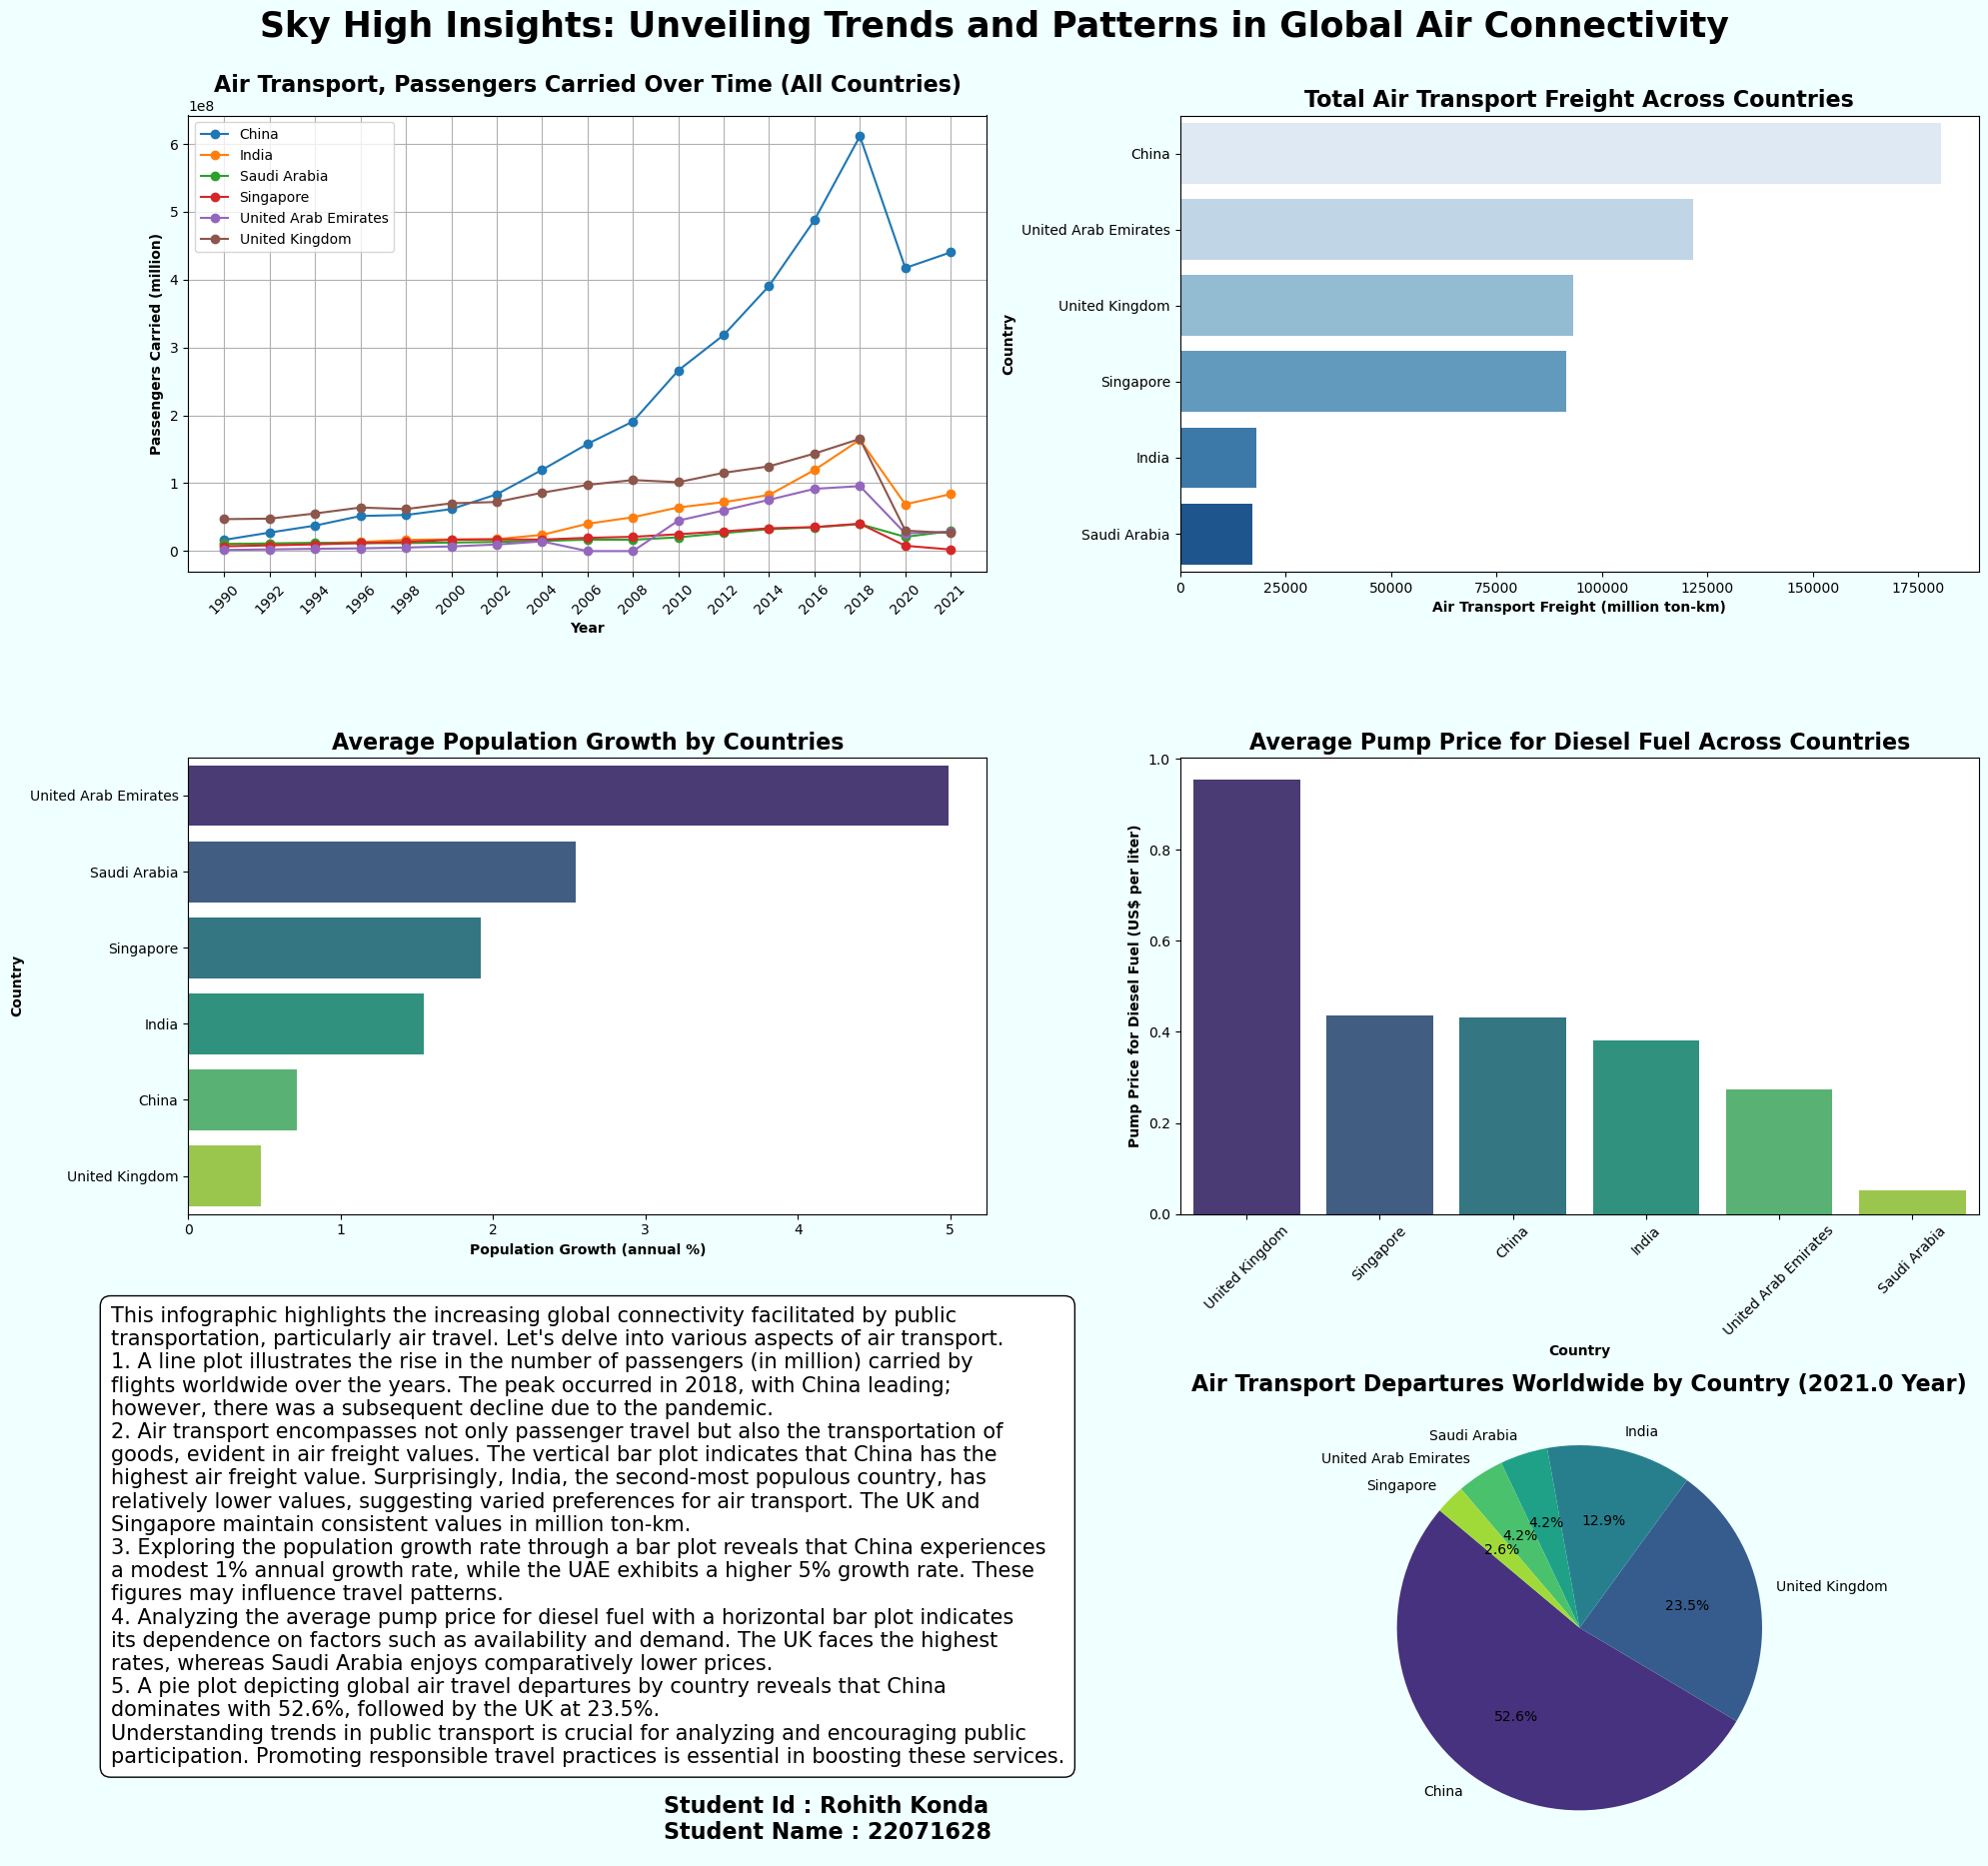

In [20]:
#Data Handling and Visualisation - Infographics Project
#Data Source Link - #https://data.worldbank.org/indicator/IS.AIR.PSGR
#GitHub Link - #https://github.com/rkrohith23/Data-Handling-and-Visualisation---Info-Project.git


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("World_Bank_Open_Data.csv")

# Set up a 3x2 grid layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 19),facecolor='azure')

# Add a title to the dashboard
fig.suptitle('Sky High Insights: Unveiling Trends and Patterns in Global Air Connectivity', fontsize=25,fontweight='bold')

# Plot 1: Air Transport, Passengers Carried Over Time
# Extract relevant columns from the DataFrame for air transport passengers data( Here Time dataframe indicates Years)
passengers_data = df[['Time', 'Country Name', 'Air transport, passengers carried']]
# Group the data by 'Country Name' for separate lines in the line plot
grouped_passengers = passengers_data.groupby('Country Name')
# Iterate through each group (country) to plot individual lines on the line plot
for country, data in grouped_passengers:
    axes[0, 0].plot(data['Time'], data['Air transport, passengers carried'], label=country, marker='o')

# Set title and labels for the line plot
axes[0, 0].set_title('Air Transport, Passengers Carried Over Time (All Countries)', fontweight='bold', fontsize=16)
axes[0, 0].set_xlabel('Year', fontweight='bold', fontsize=10)
axes[0, 0].set_ylabel('Passengers Carried (million)', fontweight='bold', fontsize=10)
# Add legend to identify each line with the corresponding country
axes[0, 0].legend(loc='upper left')
# Enable grid for better readability
axes[0, 0].grid(True)
# Rotate x-axis labels for better visibility
axes[0, 0].tick_params(axis='x', rotation=45)


# Plot 2: Total Air Transport Freight Across Countries
# Extract relevant columns for air transport freight data
air_freight_data = df[['Country Name', 'Air transport, freight (million ton-km)']]
# Group by 'Country Name' and calculate the total air transport freight (sum) for each country
grouped_air_freight = air_freight_data.groupby('Country Name')['Air transport, freight (million ton-km)'].sum().reset_index()
# Sort the data by total air transport freight in descending order
sorted_data = grouped_air_freight.sort_values(by='Air transport, freight (million ton-km)', ascending=False)

# Plot a bar plot for total air transport freight across countries
sns.barplot(x='Air transport, freight (million ton-km)', y='Country Name', data=sorted_data, palette='Blues', ax=axes[0, 1])
# Set title and labels for the bar plot
axes[0, 1].set_title('Total Air Transport Freight Across Countries', fontweight='bold', fontsize=16)
axes[0, 1].set_xlabel('Air Transport Freight (million ton-km)', fontweight='bold', fontsize=10)
axes[0, 1].set_ylabel('Country', fontweight='bold', fontsize=10)

# Plot 3: Average Population Growth by Countries
# Extract relevant columns for population growth data
population_growth_data = df[['Country Name', 'Population growth (annual %)']]
# Group by 'Country Name' and calculate the mean of population growth for each country
grouped_population_growth = population_growth_data.groupby('Country Name')['Population growth (annual %)'].mean().reset_index()
# Sort the data by average population growth in descending order
sorted_data = grouped_population_growth.sort_values(by='Population growth (annual %)', ascending=False)

# Plot a bar plot for average population growth by countries
sns.barplot(x='Population growth (annual %)', y='Country Name', data=sorted_data, palette='viridis', ax=axes[1, 0])
# Set title and labels for the bar plot
axes[1, 0].set_title('Average Population Growth by Countries', fontweight='bold', fontsize=16)
axes[1, 0].set_xlabel('Population Growth (annual %)', fontweight='bold', fontsize=10)
axes[1, 0].set_ylabel('Country', fontweight='bold', fontsize=10)

# Plot 4: Average Pump Price for Diesel Fuel Across Countries
# Extract relevant columns for diesel price data
diesel_price_data = df[['Country Name', 'Pump price for diesel fuel (US$ per liter)']]
# Drop rows with missing values in diesel price
diesel_price_data = diesel_price_data.dropna(subset=['Pump price for diesel fuel (US$ per liter)'])
# Group by 'Country Name' and calculate the mean of pump price for diesel fuel
grouped_diesel_price = diesel_price_data.groupby('Country Name')['Pump price for diesel fuel (US$ per liter)'].mean().reset_index()
# Sort the data by average pump price in descending order
sorted_data = grouped_diesel_price.sort_values(by='Pump price for diesel fuel (US$ per liter)', ascending=False)

# Plot a bar plot for average pump price for diesel fuel across countries
sns.barplot(x='Country Name', y='Pump price for diesel fuel (US$ per liter)', data=sorted_data, palette='viridis', ax=axes[1, 1])
# Set title, labels, and adjust x-axis rotation for better readability
axes[1, 1].set_title('Average Pump Price for Diesel Fuel Across Countries', fontweight='bold', fontsize=16)
axes[1, 1].set_xlabel('Country', fontweight='bold', fontsize=10)
axes[1, 1].set_ylabel('Pump Price for Diesel Fuel (US$ per liter)', fontweight='bold', fontsize=10)
axes[1, 1].tick_params(axis='x', rotation=45)


# Plot 5: Air Transport Departures Worldwide by Countries (Pie Chart)
# Convert 'Time' column to numeric (handling errors with coerce)
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
# Extract relevant columns for air transport departures worldwide
air_transport_data = df[['Time', 'Country Name', 'Air transport, registered carrier departures worldwide']]
# Group by 'Country Name' and calculate the sum of registered carrier departures worldwide
grouped_air_transport = air_transport_data.groupby('Country Name')['Air transport, registered carrier departures worldwide'].sum().reset_index()
# Sort the data by total departures in descending order
sorted_data = grouped_air_transport.sort_values(by='Air transport, registered carrier departures worldwide', ascending=False)

# Plot a pie chart for air transport departures worldwide by countries
countries = sorted_data
axes[2, 1].pie(countries['Air transport, registered carrier departures worldwide'], labels=countries['Country Name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=len(countries)))
# Set title for the pie chart
axes[2, 1].set_title(f'Air Transport Departures Worldwide by Countries ({df["Time"].max()} Year)', fontweight='bold', fontsize=16)

text1 = """This infographic highlights the increasing global connectivity facilitated by public
transportation, particularly air travel. Let's delve into various aspects of air transport.
1. A line plot illustrates the rise in the number of passengers (in million) carried by 
flights worldwide over the years. The peak occurred in 2018, with China leading; 
however, there was a subsequent decline due to the pandemic.
2. Air transport encompasses not only passenger travel but also the transportation of 
goods, evident in air freight values. The vertical bar plot indicates that China has the
highest air freight value. Surprisingly, India, the second-most populous country, has 
relatively lower values, suggesting varied preferences for air transport. The UK and 
Singapore maintain consistent values in million ton-km.
3. Exploring the population growth rate through a bar plot reveals that China experiences
a modest 1% annual growth rate, while the UAE exhibits a higher 5% growth rate. These 
figures may influence travel patterns.
4. Analyzing the average pump price for diesel fuel with a horizontal bar plot indicates
its dependence on factors such as availability and demand. The UK faces the highest
rates, whereas Saudi Arabia enjoys comparatively lower prices.
5. A pie plot depicting global air travel departures by country reveals that China 
dominates with 52.6%, followed by the UK at 23.5%.
Understanding trends in public transport is crucial for analyzing and encouraging public
participation. Promoting responsible travel practices is essential in boosting these services."""
        
text2 = "Student Id : Rohith Konda\n" \
        "Student Name : 22071628"

def add_text_subplot(ax, main_text, student_info):
    # Add main text with background
    ax.text(0.5, 0.7, main_text, ha='center', va='center', fontsize=15, color='black', multialignment='left',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    ax.axis('off')  # Turn off axis for the text subplot

    # Add student information text
    ax.text(0.8, 0.08, student_info, ha='center', va='center', fontsize=16, color='black',
            multialignment='left', fontweight='bold')
    ax.axis('off')  # Turn off axis for the text subplot

# Example usage:
add_text_subplot(axes[2, 0], text1, text2)

plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plots
plt.show()
